In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dgp import DgpProportion, ExperimentImpact

from multiprocessing import Pool
from simulate import run_simulation

### Simulate A/A tests

In [14]:
# Example run
run_simulation(_)

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,treatment_successes_cum,control_cum,treatment_cum,control_alpha_posterior,control_beta_posterior,treatment_alpha_posterior,treatment_beta_posterior,ptb,pvalue
0,0,0,0.02,0,0,True,0,0,1,0,1,2,1,1,0.675,NaN
1,1,0,0.02,0,1,False,0,0,1,1,1,2,1,2,0.495,NaN
2,2,0,0.02,0,0,True,0,0,2,1,1,3,1,2,0.615,NaN
3,3,0,0.02,0,0,True,0,0,3,1,1,4,1,2,0.680,NaN
4,4,0,0.02,0,1,False,0,0,3,2,1,4,1,3,0.568,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0.02,0,0,True,1047,942,49929,50067,1048,48883,943,49126,0.006,0.014675
99996,99996,0,0.02,0,0,True,1047,942,49930,50067,1048,48884,943,49126,0.002,0.014694
99997,99997,0,0.02,0,1,False,1047,942,49930,50068,1048,48884,943,49127,0.006,0.014675
99998,99998,0,0.02,0,1,False,1047,942,49930,50069,1048,48884,943,49128,0.007,0.014657


In [5]:
## Multiprocessing to simulate in parallel
# if __name__ == '__main__':
#     with Pool(10) as pool:
#         list_sim = pool.map(run_simulation, range(1000))
# for c,i in enumerate(list_sim):
#     i.to_parquet(f'data/sim_{c}.parquet')

# Import a list of simulated experiment results
list_sim = [pd.read_parquet(f'data/sim_{i}.parquet') for i in range(1000)]

In [16]:
# Example of simulation
list_sim[1]

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,treatment_successes_cum,control_cum,treatment_cum,control_alpha_posterior,control_beta_posterior,treatment_alpha_posterior,treatment_beta_posterior,ptb,pvalue
0,0,0,0.02,1,0,True,1,0,1,0,2,1,1,1,0.307,NaN
1,1,0,0.02,0,1,False,1,0,1,1,2,1,1,2,0.176,0.157299
2,2,0,0.02,0,0,True,1,0,2,1,2,2,1,2,0.299,0.386476
3,3,0,0.02,0,1,False,1,0,2,2,2,2,1,3,0.184,0.248213
4,4,0,0.02,1,0,True,2,0,3,2,3,2,1,3,0.104,0.136037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0.02,0,0,True,990,1011,49825,50171,991,48836,1012,49161,0.635,0.750580
99996,99996,0,0.02,0,0,True,990,1011,49826,50171,991,48837,1012,49161,0.630,0.750236
99997,99997,0,0.02,0,1,False,990,1011,49826,50172,991,48837,1012,49162,0.634,0.750578
99998,99998,0,0.02,0,1,False,990,1011,49826,50173,991,48837,1012,49163,0.633,0.750919


### Sample checkpoints

In [17]:
num_impressions_before_check = 1000
list_check = [sim.iloc[::num_impressions_before_check] for sim in list_sim]
list_check[2]

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,treatment_successes_cum,control_cum,treatment_cum,control_alpha_posterior,control_beta_posterior,treatment_alpha_posterior,treatment_beta_posterior,ptb,pvalue
0,0,0,0.02,0,1,False,0,0,0,1,1,1,1,2,0.334,NaN
1000,1000,0,0.02,0,0,True,9,13,509,492,10,501,14,480,0.834,0.345673
2000,2000,0,0.02,0,1,False,21,22,1032,969,22,1012,23,948,0.636,0.716564
3000,3000,0,0.02,0,1,False,26,29,1502,1499,27,1477,30,1471,0.649,0.677585
4000,4000,0,0.02,0,0,True,30,38,1992,2009,31,1963,39,1972,0.835,0.345598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95000,95000,0,0.02,0,0,True,923,885,47203,47798,924,46281,886,46914,0.126,0.241512
96000,96000,0,0.02,0,0,True,933,897,47693,48308,934,46761,898,47412,0.122,0.259996
97000,97000,0,0.02,0,0,True,945,911,48195,48806,946,47251,912,47896,0.140,0.284221
98000,98000,0,0.02,0,0,True,953,921,48699,49302,954,47747,922,48382,0.150,0.309943


### Analysis

In [124]:
pval_df = pd.concat([i['pvalue'] for i in list_check], axis=1).T
pval_df.index = [f'pvalue_{i}' for i in range(len(pval_df))]

ptb_df = pd.concat([i['ptb'] for i in list_check], axis=1).T
ptb_df.index = [f'ptb_{i}' for i in range(len(ptb_df))]

In [130]:
print(
    'Proportion of significant (by p-value) experiments (without peeking):', 
    (pval_df.iloc[:,-1]<0.05).mean()
)
print(
    'Proportion of "significant" (by PTB) experiments (without peeking):', 
    (ptb_df.iloc[:,-1]>0.95).mean()
)

Proportion of significant (by p-value) experiments (without peeking): 0.046
Proportion of "significant" (by PTB) experiments (without peeking): 0.042


In [131]:
print(
    'Proportion of significant (by p-value) experiments (with peeking):', 
    ((pval_df<0.05).any(axis=1)).mean()
)
print(
    'Proportion of "significant" (by PTB) experiments (with peeking):', 
    ((ptb_df>0.95).any(axis=1)).mean()
)

Proportion of significant (by p-value) experiments (with peeking): 0.391
Proportion of "significant" (by PTB) experiments (with peeking): 0.301


### Plots

#### p-values

In [116]:
pval_sample_for_plot = pval_df.sample(n=100, axis='rows', random_state=1)

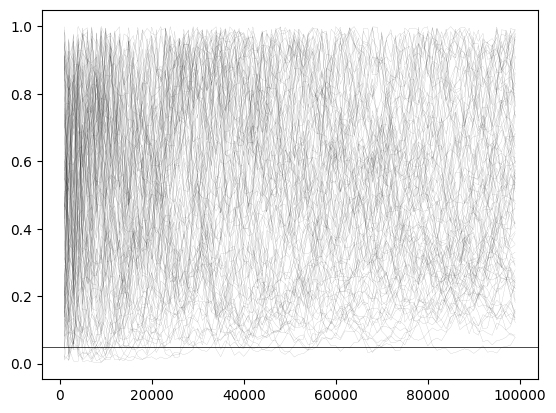

In [117]:
plt.plot(pval_sample_for_plot.T, alpha=0.5, linewidth=0.1, color='black')

pval_sample_reaching_threshold = pval_sample_for_plot[pval_sample_for_plot.iloc[:,-1] < 0.05]
plt.plot(pval_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0.05, linewidth=0.5, color='black')
plt.show()

In [118]:
pvalue_stops = np.argmax(pval_sample_for_plot.values < 0.05, axis=1)
pvalue_stops[pvalue_stops==0]=-2 # because later we add by 1 to make remaining columns nan

pval_sample_cutoff_plot = pval_sample_for_plot.copy()
for c,i in enumerate(pvalue_stops):
    pval_sample_cutoff_plot.iloc[c,i+1:] = np.nan
    
# pval_sample_cutoff_plot

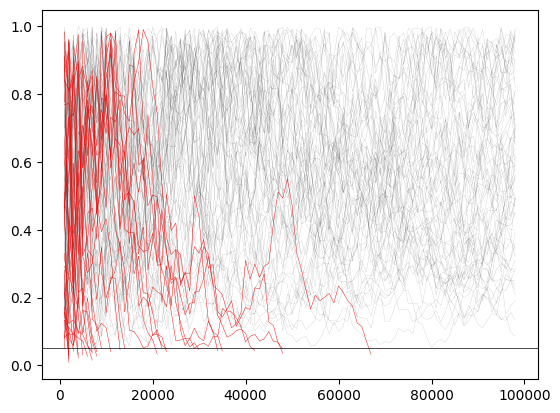

In [119]:
plt.plot(pval_sample_cutoff_plot.T, alpha=0.5, linewidth=0.1, color='black')

pval_sample_reaching_threshold = pval_sample_cutoff_plot[(pval_sample_for_plot < 0.05).any(axis=1)]
plt.plot(pval_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0.05, linewidth=0.5, color='black')
plt.show()

#### PTB

In [120]:
ptb_sample_for_plot = ptb_df.sample(n=100, axis='rows', random_state=1)
# ptb_sample_for_plot

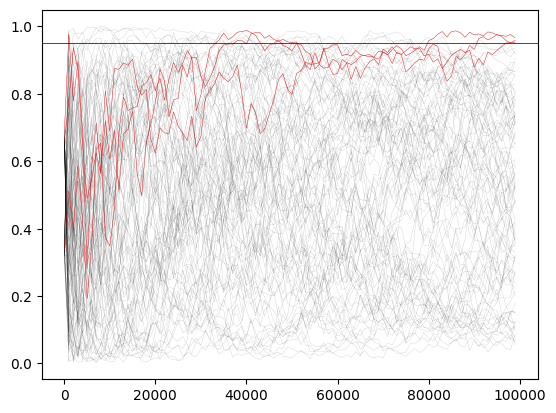

In [121]:
plt.plot(ptb_sample_for_plot.T, alpha=0.5, linewidth=0.1, color='black')

ptb_sample_reaching_threshold = ptb_sample_for_plot[ptb_sample_for_plot.iloc[:,-1] > 0.95]
plt.plot(ptb_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0.95, linewidth=0.5, color='black')
plt.show()

In [122]:
ptb_stops = np.argmax(ptb_sample_for_plot.values > 0.95, axis=1)
ptb_stops[ptb_stops==0]=-2 # because later we add by 1 to make remaining columns nan

ptb_sample_cutoff_plot = ptb_sample_for_plot.copy()
for c,i in enumerate(ptb_stops):
    ptb_sample_cutoff_plot.iloc[c,i+1:] = np.nan
    
# pval_sample_cutoff_plot

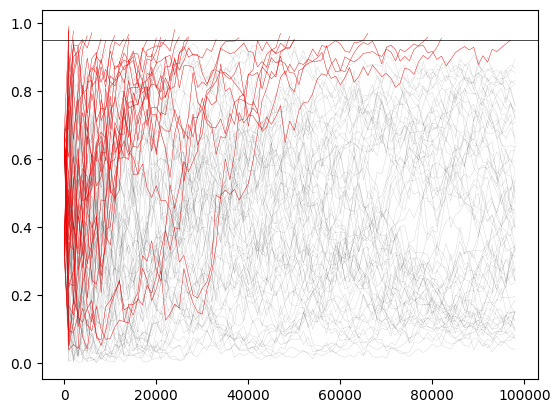

In [123]:
plt.plot(ptb_sample_cutoff_plot.T, alpha=0.5, linewidth=0.1, color='black')

ptb_sample_reaching_threshold = ptb_sample_cutoff_plot[(ptb_sample_for_plot > 0.95).any(axis=1)]
plt.plot(ptb_sample_reaching_threshold.T, alpha=0.9, linewidth=0.3, color='red')

plt.axhline(0.95, linewidth=0.5, color='black')
plt.show()

### Recycle bin

In [31]:
control_rng.beta(a=sdf.control_alpha_posterior.iloc[-1], b=sdf.control_beta_posterior.iloc[-1], size=samples)

array([0.01974007, 0.01826797, 0.01928245, ..., 0.01899221, 0.0182525 ,
       0.02020736])

<Axes: ylabel='Density'>

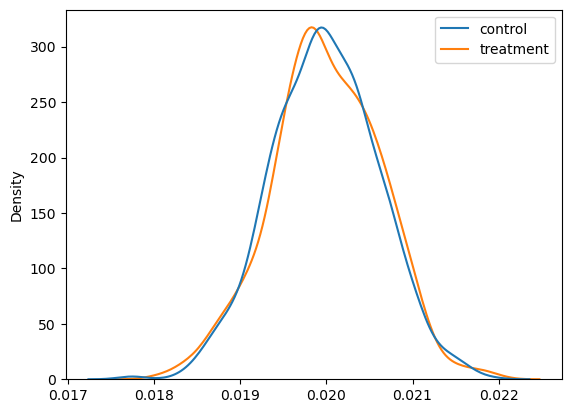

In [32]:
df_ptb = pd.DataFrame(
    data= [
        [(i['control_successes_cum']/i['control_cum']).iloc[-1] for i in list_ptb],
        [(i['treatment_successes_cum']/i['treatment_cum']).iloc[-1] for i in list_ptb],
    ], index=['control', 'treatment']
).T

sns.kdeplot(df_ptb)

In [33]:
(df_ptb.control < df_ptb.treatment).mean()

0.518

<Axes: ylabel='Density'>

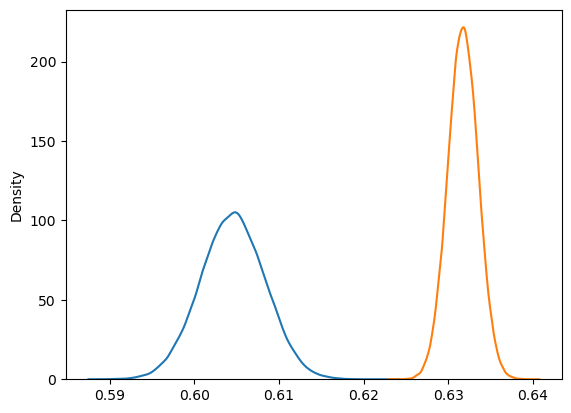

In [34]:
ca, cb, ta, tb = 10000, 6541, 45465, 26504
sns.kdeplot(np.random.beta(a=ca, b=cb, size=100000))  
sns.kdeplot(np.random.beta(a=ta, b=tb, size=100000))

In [35]:
control_rng.beta(a=[ca,ta], b=[cb,tb], size=(100_000,2)).mean(axis=0)

array([0.60455223, 0.63172637])

In [36]:
df = pd.concat([i['ptb'] for i in list_ptb], axis=1)
df.columns = range(1000)


In [37]:
(df>0.9999999).any().sum()

88

In [51]:
sdf = list_ptb[880].iloc[:4000]

from scipy.stats import ttest_ind
ttest_ind(sdf[sdf.control==True].outcome, sdf[sdf.control==False].outcome)

TtestResult(statistic=-2.688816518358321, pvalue=0.0072003307203986665, df=3998.0)

In [44]:
sdf = list_ptb[880].iloc[-1]
print(sdf['control_successes_cum']/sdf['control_cum'], sdf['treatment_successes_cum']/sdf['treatment_cum'])

0.019876050462303698 0.020841227737779463


In [43]:
list_ptb[880].iloc[0::1000]

,unit_id,cluster_id,success_prob,outcome,treatment,control,control_successes_cum,treatment_successes_cum,control_cum,treatment_cum,control_alpha_posterior,control_beta_posterior,treatment_alpha_posterior,treatment_beta_posterior,ptb
0,0,0,0.02,0,1,False,0,0,0,1,1,1,1,2,0.327
1000,1000,0,0.02,0,1,False,6,11,485,516,7,480,12,506,0.855
2000,2000,0,0.02,0,0,True,12,27,1001,1000,13,990,28,974,0.989
3000,3000,0,0.02,0,1,False,26,42,1508,1493,27,1483,43,1452,0.973
4000,4000,0,0.02,0,0,True,34,58,2033,1968,35,2000,59,1911,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95000,95000,0,0.02,0,0,True,947,995,47335,47666,948,46389,996,46672,0.830
96000,96000,0,0.02,0,0,True,961,1005,47842,48159,962,46882,1006,47155,0.826
97000,97000,0,0.02,0,0,True,970,1013,48349,48652,971,47380,1014,47640,0.802
98000,98000,0,0.02,0,1,False,975,1025,48861,49140,976,47887,1026,48116,0.864


In [38]:
import plotly.express as px
px.line(df.iloc[np.arange(0,20_000,1000), :1000:10])

<Axes: >

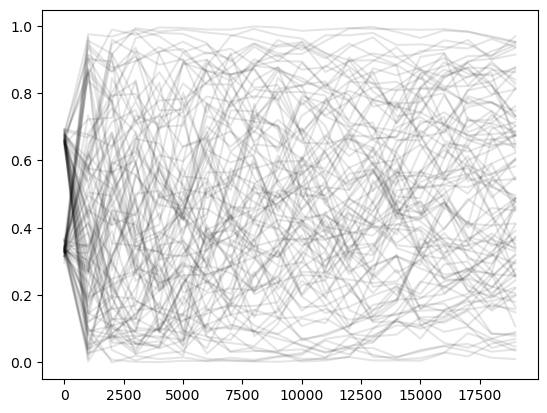

In [47]:
df.iloc[np.arange(0,20_000,1000), :1000:10].plot(legend=False, color='black', alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
for i in list_ptb:
    data = i[:20_000:100]
    if (data>0.9).any():
        color='red'
        alpha=1
    else:
        color='black'
        alpha=0.1
    ax.plot(data, alpha=alpha, linewidth=0.2, color=color)